<a href="https://colab.research.google.com/github/Aeagon07/Natural-Language-Processing-/blob/main/Quora_Comp_Project_Intial_Info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()   # Choose file manually

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving train.csv to train (1).csv


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.shape

(404290, 6)

In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
45124,45124,80894,80895,How much iron is there in Bovril?,How do Bovril and Marmite differ?,0
272680,272680,390988,390989,What does organic consist of in relation to food?,What is organic food?,0
180198,180198,276323,276324,Are there any job scopes for an Indian electri...,I have an Electrical and Electronics Engineeri...,0
301528,301528,106551,222168,What are the pros and cons of a universal worl...,What would be the advantages and disadvantages...,1
309577,309577,55536,138592,What books should be referred for Cs executive...,I will be appearing for CS Executive on Decemb...,1
271299,271299,389356,212955,What are some best software product (not servi...,What is the best software company in Chennai?,0
86855,86855,146387,105909,How can I overcome a mobile phone addiction?,How do you deal with internet addiction?,0
355072,355072,484283,484284,What are the advantages or disadvantages of bu...,Is there an online shop where I can buy cannab...,0
303320,303320,426435,426436,How do I increase the oxygen levels inside a r...,How does oxygen levels vary in a running AC car?,0
125484,125484,202425,202426,My carpet got soaked with water. How do I get ...,What are some ways to get rid of mildew in a c...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [8]:
# Check duplicacy
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

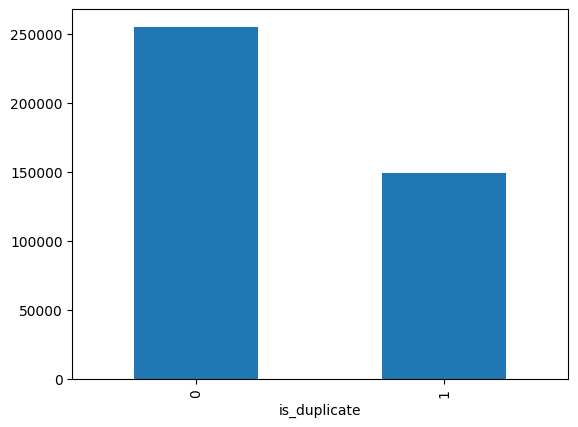

In [9]:
# distribution of duplicate and non-duplicate question

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

# Dataset is slightly imbalance it is more on 0

In [10]:
# Check the repeated question in dataset
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


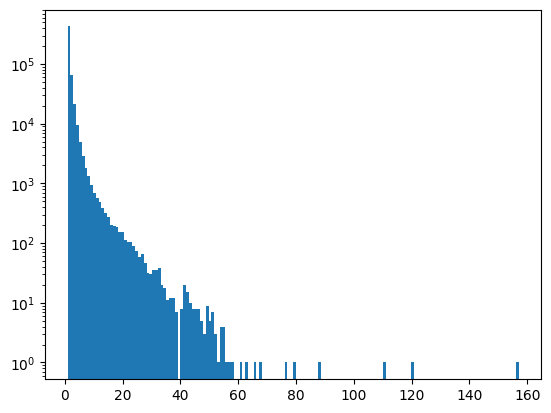

In [11]:
# Repeated question histogram

plt.hist(qid.value_counts().values, bins= 160)
plt.yscale('log')
plt.show()

## **Only BoW Analysis**

In [12]:
new_df = df.sample(30000)

In [13]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [14]:
new_df.duplicated().sum()

np.int64(0)

In [15]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
256570,How long is enough for a penis?,What's the average size of an adult human peni...
343832,I leave my android phone plugged into its AC c...,Why do my hands are always too cold?
376494,Why there is a sound when we crack our knuckles?,What is the cracking sound in our knuckles whe...
229417,How can Modi government prevent black money by...,Would banning notes of denominations 500 and 1...
110399,How should I learn software development?,How can I Learn software development?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [18]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
256570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229417,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129915,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [20]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
256570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229417,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
110399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Now train test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size=0.2, random_state=1)

In [22]:
# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7405

In [23]:
# Apply XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7216666666666667

## **Craeting Some Basic Faeture and BoW**

In [24]:
new_df = df.sample(30000, random_state=2)

In [25]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

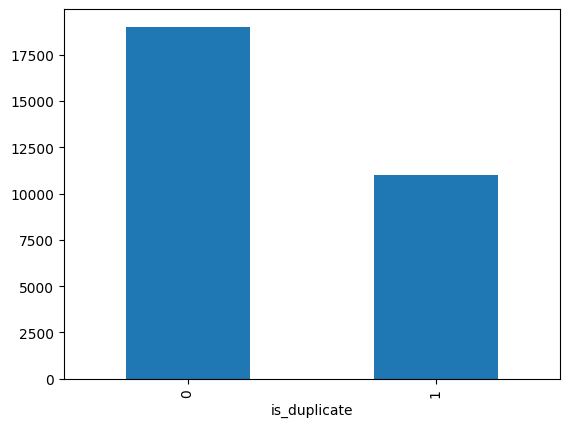

In [27]:
# Distribution of Duplicate and Non-Duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [28]:
# Repeated Question

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print("Number of unique questions: ", np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of questions getting repeated: ", x[x].shape[0])

Number of unique questions:  55299
Number of questions getting repeated:  3480


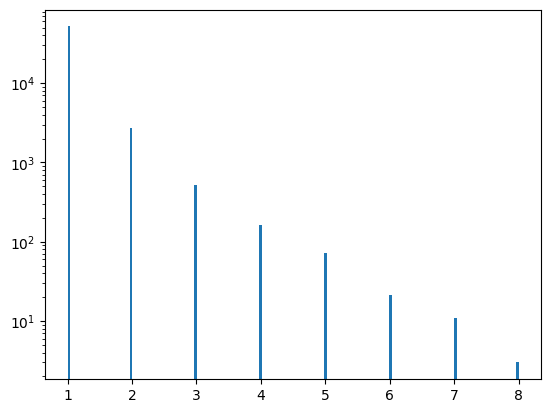

In [29]:
# Histogram
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [30]:
# Feature Engineering

# Feat 1 => 2 columns containing the length of q1 and q2
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [31]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [32]:
# Feat 2 => Words in q1 and q2

new_df['q1_num_word'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_word'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [33]:
# Feat 3 => Common words

def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
  return len(w1 & w2)

In [34]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [35]:
# Feat 4 => total word in the question

def total_word(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
  return (len(w1) + len(w2))

In [36]:
new_df['total_word'] = new_df.apply(total_word, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [37]:
# Feat 5 => Share words = common_words /total_words

new_df['word_share'] = round(new_df['word_common']/new_df['total_word'], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


minimum characters 2
maximum characters 391
average num of characters 59


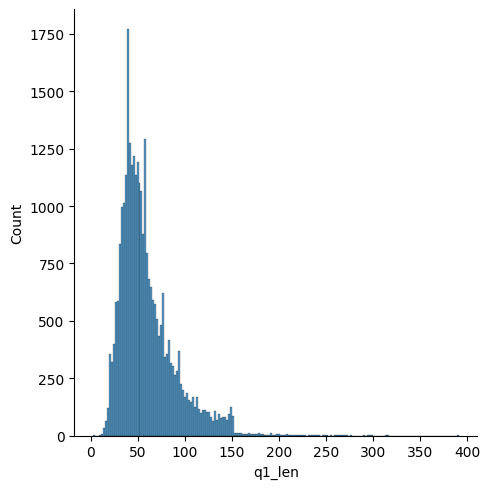

In [38]:
# Analysis Features

sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


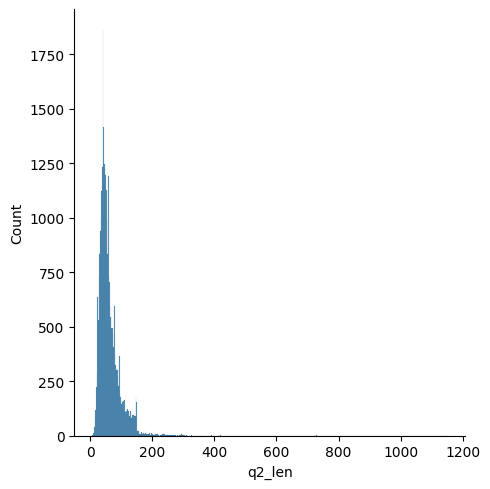

In [39]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


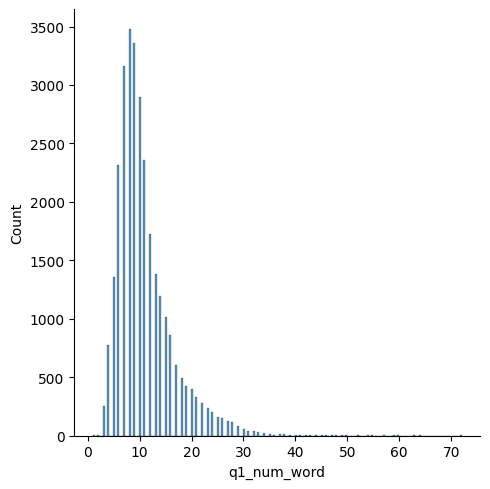

In [40]:
# Num_Words

sns.displot(new_df['q1_num_word'])
print('minimum words',new_df['q1_num_word'].min())
print('maximum words',new_df['q1_num_word'].max())
print('average num of words',int(new_df['q1_num_word'].mean()))

minimum words 1
maximum words 72
average num of words 10


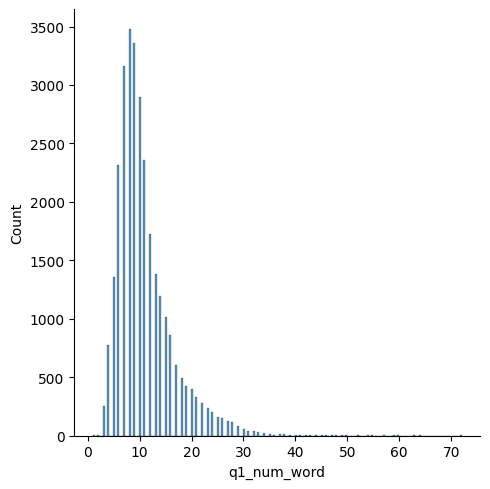

In [41]:
sns.displot(new_df['q1_num_word'])
print('minimum words',new_df['q1_num_word'].min())
print('maximum words',new_df['q1_num_word'].max())
print('average num of words',int(new_df['q1_num_word'].mean()))

/tmp/ipython-input-1765868155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
/tmp/ipython-input-1765868155.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='

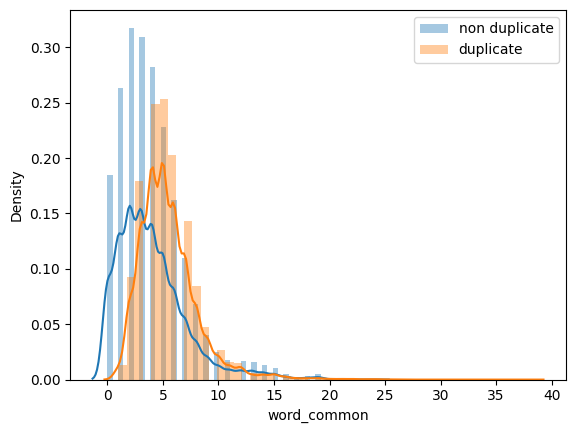

In [42]:
# Common Words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipython-input-4147441853.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_word'],label='non duplicate')
/tmp/ipython-input-4147441853.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_word'],label='du

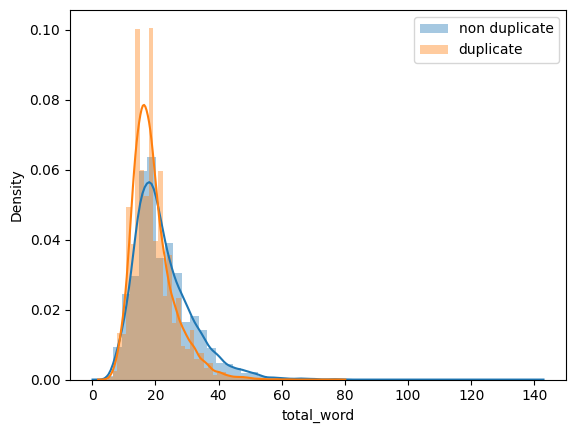

In [43]:
# Total Word

sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_word'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_word'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipython-input-542246512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
/tmp/ipython-input-542246512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='dupl

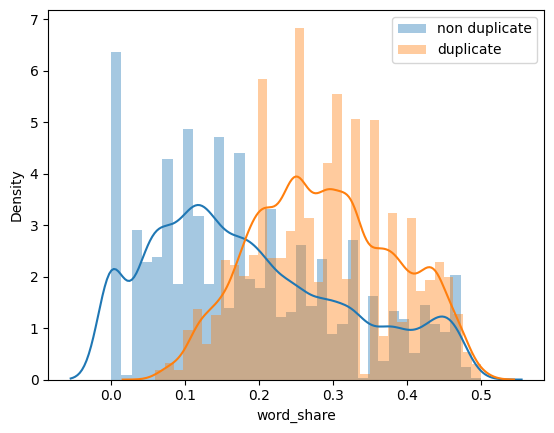

In [44]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [45]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [46]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [47]:
# Vector creation

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [48]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

# 3000 in q1 and q1 respctively => 6000 cols size

(30000, 6000)

In [49]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Train test Split
X_train,X_test,Y_train,Y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [53]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7686666666666667

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7668333333333334

# **Advanced Features**

 ## 1. Token Features

**cwc_min:** This is the ratio of the number of common words to the length of the smaller question

**cwc_max:** This is the ratio of the number of common words to the length of the larger question

**csc_min:** This is the ratio of the number of common stop words to the smaller stop word count among the two questions
**csc_max:** This is the ratio of the number of common stop words to the larger stop word count among the two questions

**ctc_min:** This is the ratio of the number of common tokens to the smaller token count among the two questions

**ctc_max:** This is the ratio of the number of common tokens to the larger token count among the two questions

**last_word_eq:** 1 if the last word in the two questions is same, 0 otherwise

**first_word_eq:** 1 if the first word in the two questions is same, 0 otherwise

## 2. Length Based Features

**mean_len:** Mean of the length of the two questions (number of words)

**abs_len_diff:** Absolute difference between the length of the two questions (number of words)

**longest_substr_ratio:** Ratio of the length of the longest substring among the two questions to the length of the smaller question

## 3. Fuzzy Features

**fuzz_ratio:** fuzz_ratio score from fuzzywuzzy

**fuzz_partial_ratio:** fuzz_partial_ratio from fuzzywuzzy

**token_sort_ratio:** token_sort_ratio from fuzzywuzzy

**token_set_ratio:** token_set_ratio from fuzzywuzzy